## Exploratory Data Analisys of the datasets

In [1]:
# Packages
import pandas as pd
import numpy as np

In [271]:
# Read datasets
df_customer_data = pd.read_csv('../data/initial_datasets/eci_customer_data.csv')
df_product_groups = pd.read_csv('../data/initial_datasets/eci_product_groups.csv')
df_product_master = pd.read_csv('../data/initial_datasets/eci_product_master.csv')
df_stores_clusters = pd.read_csv('../data/initial_datasets/eci_stores_clusters.csv')
df_stores = pd.read_csv('../data/initial_datasets/eci_stores.csv')
df_transactions = pd.read_csv('../data/initial_datasets/eci_transactions.csv')

##### Customer dataset

In [7]:
df_customer_data.head()

,client_id,phone_number,email_address,city,state,zip_code,education_level,occupation,loyalty_member,loyalty_number,loyalty_points
0,500001,NaN,n.edwards+spam@outlook.com,Spokane,WA,99201,High School,NaN,No,NaN,339
1,500002,(412) 698-7960,lisa_cook@yahoo.com,Pittsburgh,PA,15222,High School,Sales Representative,Yes,LP525082,406
2,500003,(303) 491-3774,NaN,Fort Collins,CO,80526,College Graduate,Analyst,True,950139,14
3,500004,(803) 255-0104,betty-campbell@gmail.com,Charleston,SC,29401,Some College,Supervisor,No,NaN,NaN
4,500005,(303) 596-8987,NaN,Aurora,CO,80012,Associates,NaN,Yes,NaN,NaN


In [8]:
df_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801923 entries, 0 to 801922
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   client_id        801923 non-null  int64 
 1   phone_number     705749 non-null  object
 2   email_address    657079 non-null  object
 3   city             801923 non-null  object
 4   state            801923 non-null  object
 5   zip_code         734663 non-null  object
 6   education_level  682042 non-null  object
 7   occupation       657407 non-null  object
 8   loyalty_member   762074 non-null  object
 9   loyalty_number   440681 non-null  object
 10  loyalty_points   392749 non-null  object
dtypes: int64(1), object(10)
memory usage: 67.3+ MB


In [12]:
df_customer_data.isnull().sum()

client_id               0
phone_number        96174
email_address      144844
city                    0
state                   0
zip_code            67260
education_level    119881
occupation         144516
loyalty_member      39849
loyalty_number     361242
loyalty_points     409174
dtype: int64

In [88]:
df_customer_data.duplicated(keep=False).sum()

np.int64(0)

In [121]:
for col in df_customer_data.columns:
    print(col, 
          df_customer_data[col].value_counts().min(),
          df_customer_data[col].value_counts().max(),
          len(df_customer_data[col].unique()))

client_id 1 1 801923
phone_number 1 3486 684762
email_address 1 2365 418025
city 5524 18116 108
state 28325 50144 22
zip_code 1226 5259 342
education_level 3358 109273 28
occupation 4326 49897 39
loyalty_member 15287 267105 9
loyalty_number 1 3804 386690
loyalty_points 1 1292 27255


In [199]:
df_zip_code = df_customer_data['zip_code'].str.replace(r'\s+', '', regex=True)
df_zip_code = df_zip_code.str.replace(r'-', '', regex=True)
df_zip_code = df_zip_code.str.replace(r'A', '5', regex=True)
df_zip_code = df_zip_code.str.replace(r'5BCDE', '100000', regex=True)
df_zip_code.loc[df_zip_code.astype('float') < 0].info()

<class 'pandas.core.series.Series'>
Index: 0 entries
Series name: zip_code
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 0.0+ bytes


In [262]:
df_customer_data['zip_code'].value_counts().index.tolist()

['43229',
 '43201',
 '43215',
 '80016',
 '80012',
 '62701',
 '80010',
 '62704',
 '62711',
 '99999',
 '1234',
 '1234A',
 '12 345',
 '00000',
 '123456',
 'ABCDE',
 '12-345',
 '32301',
 '29615',
 '28401',
 '29401',
 '31201',
 '31404',
 '32819',
 '31419',
 '29301',
 '33629',
 '27701',
 '30909',
 '28277',
 '27605',
 '32225',
 '28202',
 '27410',
 '29733',
 '29302',
 '32801',
 '27403',
 '28403',
 '27401',
 '31401',
 '27705',
 '29601',
 '32308',
 '27615',
 '29307',
 '29605',
 '29730',
 '32216',
 '30904',
 '32304',
 '27713',
 '29201',
 '32803',
 '29203',
 '33602',
 '28207',
 '29732',
 '29414',
 '32202',
 '29210',
 '33606',
 '29403',
 '31210',
 '28409',
 '30901',
 '27601',
 '31204',
 '46601',
 '44301',
 '48093',
 '44312',
 '60563',
 '48226',
 '48104',
 '61602',
 '46201',
 '48917',
 '46614',
 '43604',
 '61604',
 '44120',
 '43615',
 '61614',
 '60540',
 '46802',
 '47708',
 '48235',
 '46032',
 '46240',
 '48089',
 '45220',
 '46617',
 '46815',
 '48088',
 '45202',
 '48103',
 '44113',
 '48201',
 '43606'

In [198]:
df_customer_data['loyalty_member'].value_counts().index.tolist()

['Yes', 'No', 'Y', 'N', 'True', '1', 'False', '0']

In [263]:
df_customer_data['loyalty_number'].iloc[149499]

'813335'

In [213]:
df_customer_data['loyalty_points'].value_counts().index.tolist()

['9999999',
 'PENDING',
 'EXPIRED',
 '-150',
 'ERROR',
 '-25',
 '999999999',
 '22',
 '4',
 '85',
 '50',
 '12',
 '78',
 '35',
 '69',
 '15',
 '13',
 '3',
 '43',
 '38',
 '74',
 '67',
 '48',
 '63',
 '68',
 '1',
 '97',
 '32',
 '84',
 '61',
 '75',
 '54',
 '59',
 '99',
 '47',
 '53',
 '87',
 '9',
 '33',
 '92',
 '27',
 '91',
 '0',
 '58',
 '20',
 '94',
 '71',
 '77',
 '34',
 '93',
 '21',
 '57',
 '45',
 '30',
 '42',
 '28',
 '62',
 '66',
 '19',
 '39',
 '65',
 '11',
 '95',
 '60',
 '41',
 '6',
 '56',
 '29',
 '23',
 '44',
 '83',
 '72',
 '2',
 '64',
 '36',
 '18',
 '16',
 '26',
 '51',
 '24',
 '80',
 '10',
 '55',
 '98',
 '5',
 '37',
 '82',
 '14',
 '49',
 '79',
 '52',
 '76',
 '25',
 '90',
 '46',
 '100',
 '70',
 '88',
 '96',
 '86',
 '73',
 '7',
 '89',
 '31',
 '17',
 '81',
 '40',
 '8',
 '268',
 '358',
 '164',
 '230',
 '158',
 '373',
 '389',
 '256',
 '293',
 '203',
 '199',
 '216',
 '476',
 '419',
 '280',
 '270',
 '463',
 '434',
 '350',
 '116',
 '118',
 '249',
 '205',
 '202',
 '306',
 '281',
 '137',
 '153',
 

##### Dataset product groups

In [13]:
df_product_groups.head()

,sku,product_name,price_group_id,price_group_name,group_type
0,BOOEDTE001,PageTurn Essential Textbooks,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
1,BOOEDTE002,Bookworm Advanced Textbooks,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
2,BOOEDTE004,PageTurn Essential Textbooks,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
3,CLOMESH002,DressRight Shirts Collection,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
4,CLOMESH005,StyleX Relaxed Shirts,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal


In [14]:
df_product_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sku               80 non-null     object
 1   product_name      80 non-null     object
 2   price_group_id    80 non-null     object
 3   price_group_name  80 non-null     object
 4   group_type        80 non-null     object
dtypes: object(5)
memory usage: 3.3+ KB


In [92]:
df_product_groups.duplicated(keep='last').sum()

np.int64(0)

In [122]:
for col in df_product_groups.columns:
    print(col, 
          df_product_groups[col].value_counts().min(),
          df_product_groups[col].value_counts().max(),
          len(df_product_groups[col].unique()))

sku 1 3 73
product_name 1 3 70
price_group_id 6 16 8
price_group_name 6 16 8
group_type 8 34 5


In [266]:
df_product_groups['sku'].value_counts().index.tolist()

['ELECOLA006',
 'SPOFIEQ004',
 'SPOFISU004',
 'ELEMOAC009',
 'ELEMOAC008',
 'ELECOLA009',
 'BOOEDTE001',
 'ELECOLA005',
 'ELEMOSM004',
 'ELEMOSM002',
 'ELECOTA007',
 'ELECOTA002',
 'ELECOTA001',
 'BOOFIMY008',
 'ELEMOAC006',
 'ELEMOAC002',
 'GROBESO003',
 'BOOFIMY006',
 'BOOFIMY005',
 'BOOFIMY002',
 'ELEMOSM006',
 'GROBESO006',
 'GROBESO005',
 'GROSNCO019',
 'SPOFISU002',
 'SPOFIEQ007',
 'SPOFIEQ005',
 'BOONOSE005',
 'BOONOSE003',
 'BOONOSE002',
 'GROSNCO015',
 'GROBESO007',
 'GROSNCO009',
 'GROSNCO001',
 'GROSNCH023',
 'GROSNCH018',
 'GROSNCH014',
 'GROSNCH008',
 'SPOFISU006',
 'SPOFIAP005',
 'SPOFIEQ009',
 'CLOWOBO009',
 'BOOEDTE004',
 'CLOMESH002',
 'CLOMESH005',
 'CLOMESH013',
 'ELECOLA004',
 'TOYEDST001',
 'TOYEDST004',
 'TOYEDST007',
 'CLOMEPA001',
 'CLOMEPA002',
 'CLOMEPA008',
 'CLOMEPA009',
 'CLOWOBO002',
 'CLOWOBO007',
 'CLOWOBO015',
 'BOOEDTE002',
 'ELEAUHE002',
 'ELEAUHE009',
 'ELEAUHE011',
 'ELEAUHE012',
 'ELECODE002',
 'ELECODE003',
 'ELECODE004',
 'ELECODE011',
 'ELECOLA0

##### Dataset product master

In [15]:
df_product_master.head()

,sku,product_name,category,group,subgroup,brand,base_price,initial_ticket_price,costos
0,ELECOLA001,TechPro Laptops Smart 2025,Electronics,Computing,Laptops,TechPro,284.94,355.14,225.84
1,ELECOLA002,Electra Laptops Ultra Pro,Electronics,Computing,Laptops,Electra,311.83,352.74,209.99
2,ELECOLA003,CircuitCity Laptops Air 2024,Electronics,Computing,Laptops,CircuitCity,246.96,301.35,192.61
3,ELECOLA004,TechPro Laptops Elite 2025,Electronics,Computing,Laptops,TechPro,324.96,420.49,212.23
4,ELECOLA005,CircuitCity Laptops Pro S,Electronics,Computing,Laptops,CircuitCity,339.88,386.23,231.75


In [16]:
df_product_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sku                   861 non-null    object 
 1   product_name          861 non-null    object 
 2   category              861 non-null    object 
 3   group                 861 non-null    object 
 4   subgroup              861 non-null    object 
 5   brand                 861 non-null    object 
 6   base_price            861 non-null    float64
 7   initial_ticket_price  861 non-null    float64
 8   costos                861 non-null    float64
dtypes: float64(3), object(6)
memory usage: 60.7+ KB


In [95]:
df_product_master.duplicated(keep='last').sum()

np.int64(0)

In [124]:
df_product_master.describe()

,base_price,initial_ticket_price,costos
count,861.000000,861.000000,861.000000
mean,70.972915,85.098676,44.630348
std,85.525953,102.749264,63.730344
min,8.020000,8.880000,5.760000
25%,24.300000,28.720000,11.250000
50%,43.000000,50.580000,20.040000
75%,77.950000,93.290000,45.930000
max,358.790000,452.690000,281.260000


In [ ]:
# IQR method to detect outliers
df_product_master_numerical = df_product_master.select_dtypes(include=['number'])
Q1 = df_product_master_numerical.quantile(0.25)
Q3 = df_product_master_numerical.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_product_master_numerical[(df_product_master_numerical < lower_bound) & 
                            (df_product_master_numerical > upper_bound)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   base_price            0 non-null      float64
 1   initial_ticket_price  0 non-null      float64
 2   costos                0 non-null      float64
dtypes: float64(3)
memory usage: 20.3 KB


In [123]:
for col in df_product_master.columns:
    print(col, 
          df_product_master[col].value_counts().min(),
          df_product_master[col].value_counts().max(),
          len(df_product_master[col].unique()))

sku 1 2 854
product_name 1 7 713
category 74 170 8
group 22 71 23
subgroup 6 25 74
brand 9 45 40
base_price 1 3 801
initial_ticket_price 1 3 818
costos 1 5 770


In [301]:
df_product_master['subgroup'].value_counts().index.tolist()

['Chips',
 'Nuts',
 'Cookies',
 'Coffee',
 'Baking',
 'Outerwear',
 'Underwear',
 'Tops',
 'Infants',
 'Boys',
 'Canned Goods',
 'Shirts',
 'Bottoms',
 'Juice',
 'Pasta',
 'Headphones',
 'History',
 'Styling',
 'Reference',
 'Soda',
 'Board Games',
 'Romance',
 'Utensils',
 'Face',
 'Eyes',
 'Smartphones',
 'Wearables',
 'Lips',
 'Pants',
 'Desktops',
 'Textbooks',
 'Speakers',
 'Science Fiction',
 'Specialty',
 'Dresses',
 'Girls',
 'Treatments',
 'Bedroom',
 'Biography',
 'Cleansers',
 'Shampoo',
 'Equipment',
 'Bakeware',
 'Card Games',
 'Camping',
 'Arts & Crafts',
 'Jackets',
 'Mystery',
 'Pots & Pans',
 'Tablets',
 'Accessories',
 'Home Audio',
 'Self-Help',
 'Major Appliances',
 'Dining',
 'Vehicles',
 'Figures',
 'Laptops',
 'STEM',
 'Water Sports',
 'Treatment',
 'Moisturizers',
 "Children's Learning",
 'Hiking',
 'Baseball',
 'Supplements',
 'Apparel',
 'Living Room',
 'Small Appliances',
 'Learning',
 'Soccer',
 'Basketball',
 'Playsets',
 'Puzzles']

In [299]:
a = "_Abc$@'s"
a.lower().replace('_', '0').replace('$', '').replace('@', '2').replace("'s", '3')

'0abc23'

##### Dataset stores clusters

In [18]:
df_stores_clusters.head()

,STORE_ID,BRAND,STORE_NAME,CLUSTER
0,S00001,PrimeGoods,PrimeGoods - Hillsboro,Cluster_West_Coast
1,S00002,MegaShop,MegaShop Indianapolis Eastside,Midwest_Cluster
2,STORE0003,MarketExpress,MarketExpress - Las Vegas,Mountain_Cluster
3,STORE0004,MegaShop,MegaShop - Oklahoma City,Texas_Cluster
4,S00005,PrimeGoods,PrimeGoods - Charlotte,NC_Cluster


In [17]:
df_stores_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STORE_ID    157 non-null    object
 1   BRAND       157 non-null    object
 2   STORE_NAME  157 non-null    object
 3   CLUSTER     140 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [99]:
df_stores_clusters.duplicated(keep='last').sum()

np.int64(0)

In [125]:
for col in df_stores_clusters.columns:
    print(col, 
          df_stores_clusters[col].value_counts().min(),
          df_stores_clusters[col].value_counts().max(),
          len(df_stores_clusters[col].unique()))

STORE_ID 1 1 157
BRAND 8 25 9
STORE_NAME 1 3 144
CLUSTER 5 16 14


In [229]:
df_stores_clusters['STORE_ID'].value_counts().index.tolist()

['S00001',
 '000109',
 'S00102',
 'S00103',
 'S00104',
 'S00105',
 'S00106',
 'S00107',
 'S00108',
 'S00110',
 'S00100',
 'S00111',
 'S00112',
 'S00113',
 'S00114',
 'STORE0115',
 'STORE0116',
 'S00117',
 'S00101',
 'S00099',
 'S00080',
 'S00089',
 '000082',
 'S00083',
 'S00084',
 'S00085',
 'S00086',
 'S00087',
 'S00088',
 'S00090',
 'S00098',
 'S00091',
 'STORE0092',
 'S00093',
 '000094',
 'S00095',
 'S00096',
 'S00097',
 'STORE0118',
 'S00119',
 'S00120',
 'S00148',
 'S00141',
 'S00142',
 'S00143',
 'S00144',
 'S00145',
 'S00146',
 'S00147',
 'STORE0149',
 'S00121',
 'S00150',
 '000151',
 'S00152',
 'S00153',
 'S00154',
 'S00155',
 'S00156',
 'S00140',
 'S00139',
 'S00138',
 'S00137',
 'S00122',
 'STORE0123',
 'S00124',
 'S00125',
 'S00126',
 'S00127',
 'S00128',
 'STORE0129',
 'S00130',
 'S00131',
 '000132',
 'STORE0133',
 'S00134',
 'S00135',
 'S00136',
 'S00081',
 '000079',
 'S00002',
 'S00030',
 'STORE0023',
 'S00024',
 'S00025',
 'S00026',
 'S00027',
 'S00028',
 '000029',
 'S00

##### Dataset stores

In [272]:
df_stores.head()

,STORE_ID,BRAND,STORE_NAME,ADDRESS1,ADDRESS2,CITY,STATE,ZIP,OPENDATE,CLOSEDATE,STORE_TYPE,REGION
0,S00001,PrimeGoods,PrimeGoods - Hillsboro,5735 NE Washington Pl,NaN,Hillsboro,OR,74820,2015-01-10 00:00:00,NaN,Express,West
1,S00002,MegaShop,MegaShop Indianapolis Eastside,3557 Cedar Ct,Unit 89,Indianapolis,IN,33483-1775,2012-03-23 00:00:00,NaN,Express,Midwest
2,STORE0003,MarketExpress,MarketExpress - Las Vegas,7870 W Church Ave,NaN,Las Vegas,NV,49099,2021-09-23 00:00:00,NaN,Outlet,West
3,STORE0004,MegaShop,MegaShop - Oklahoma City,3105 N Washington Pl,NaN,Oklahoma City,OK,80592,06/30/2015,NaN,Mall,Southwest
4,S00005,PrimeGoods,PrimeGoods - Charlotte,8756 SW Maple Ln,Suite 848,Charlotte,NC,32299,2019-06-10 00:00:00,NaN,Express,Southeast


In [273]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STORE_ID    157 non-null    object
 1   BRAND       157 non-null    object
 2   STORE_NAME  157 non-null    object
 3   ADDRESS1    157 non-null    object
 4   ADDRESS2    43 non-null     object
 5   CITY        157 non-null    object
 6   STATE       157 non-null    object
 7   ZIP         151 non-null    object
 8   OPENDATE    157 non-null    object
 9   CLOSEDATE   18 non-null     object
 10  STORE_TYPE  155 non-null    object
 11  REGION      157 non-null    object
dtypes: object(12)
memory usage: 14.8+ KB


In [274]:
df_stores.duplicated(keep='last').sum()

np.int64(0)

In [275]:
for col in df_stores.columns:
    print(col, 
          df_stores[col].value_counts().min(),
          df_stores[col].value_counts().max(),
          len(df_stores[col].unique()))

STORE_ID 1 1 157
BRAND 8 25 9
STORE_NAME 1 3 144
ADDRESS1 1 1 157
ADDRESS2 1 3 35
CITY 1 5 77
STATE 2 13 22
ZIP 1 1 152
OPENDATE 1 2 155
CLOSEDATE 1 1 19
STORE_TYPE 3 44 9
REGION 20 47 5


In [276]:
df_stores['ZIP'].value_counts().index.tolist()

['74820',
 '86975',
 '18472',
 '21240',
 '56403',
 '21190',
 '54199',
 '44542',
 '43154',
 '52849',
 '50379-1913',
 '17597',
 '86449',
 '67169',
 '56099',
 '32190',
 '61151',
 '81906',
 '91835',
 '78487',
 '73370',
 '33472',
 '74027',
 '96205',
 '71332',
 '65731',
 '78056',
 '19596',
 '26029',
 '44051',
 '35122-6017',
 '40682',
 '91912',
 '78673',
 '39118',
 '31038',
 '87064-5897',
 '18244',
 '16548',
 '96328',
 '11988',
 '29233',
 '11920',
 '85945',
 '76897',
 '30025',
 '66704',
 '58516',
 '71934',
 '53370',
 '71744',
 '86274',
 '61756',
 '99211-2505',
 '86674',
 '36049',
 '94892',
 '32440',
 '29873',
 '81854',
 '48342-5072',
 '70948',
 '11401',
 '30936',
 '71215',
 '46081-8763',
 '34272-7474',
 '60081',
 '91050',
 '62160',
 '90070',
 '94995',
 '55475',
 '88077',
 '35121',
 '60331-7406',
 '33483-1775',
 '34504',
 '90642',
 '34285',
 '97369',
 '21314',
 '10302',
 '57915-5632',
 '37285',
 '63441',
 '49809',
 '51157',
 '56197',
 '12443',
 '29256',
 '96444',
 '86534-6954',
 '60990',
 '529

In [282]:
for n, s in enumerate(df_stores['STORE_ID'].str.replace('TORE', '0')[:40]):
    s = s[1:]
    s = 'S' + s
    print(s, df_stores['STORE_ID'].iloc[n])
    #df_stores['STORE_ID'].iloc[n] = s

S00001 S00001
S00002 S00002
S00003 STORE0003
S00004 STORE0004
S00005 S00005
S00006 000006
S00007 S00007
S00008 000008
S00009 S00009
S00010 S00010
S00011 S00011
S00012 S00012
S00013 S00013
S00014 S00014
S00015 S00015
S00016 S00016
S00017 000017
S00018 S00018
S00019 S00019
S00020 S00020
S00021 S00021
S00022 STORE0022
S00023 STORE0023
S00024 S00024
S00025 S00025
S00026 S00026
S00027 S00027
S00028 S00028
S00029 000029
S00030 S00030
S00031 S00031
S00032 S00032
S00033 S00033
S00034 S00034
S00035 S00035
S00036 S00036
S00037 S00037
S00038 S00038
S00039 S00039
S00040 S00040


In [284]:
df_stores['STORE_ID'].value_counts().index.to_numpy()

array(['S00001', '000109', 'S00102', 'S00103', 'S00104', 'S00105',
       'S00106', 'S00107', 'S00108', 'S00110', 'S00100', 'S00111',
       'S00112', 'S00113', 'S00114', 'STORE0115', 'STORE0116', 'S00117',
       'S00101', 'S00099', 'S00080', 'S00089', '000082', 'S00083',
       'S00084', 'S00085', 'S00086', 'S00087', 'S00088', 'S00090',
       'S00098', 'S00091', 'STORE0092', 'S00093', '000094', 'S00095',
       'S00096', 'S00097', 'STORE0118', 'S00119', 'S00120', 'S00148',
       'S00141', 'S00142', 'S00143', 'S00144', 'S00145', 'S00146',
       'S00147', 'STORE0149', 'S00121', 'S00150', '000151', 'S00152',
       'S00153', 'S00154', 'S00155', 'S00156', 'S00140', 'S00139',
       'S00138', 'S00137', 'S00122', 'STORE0123', 'S00124', 'S00125',
       'S00126', 'S00127', 'S00128', 'STORE0129', 'S00130', 'S00131',
       '000132', 'STORE0133', 'S00134', 'S00135', 'S00136', 'S00081',
       '000079', 'S00002', 'S00030', 'STORE0023', 'S00024', 'S00025',
       'S00026', 'S00027', 'S00028'

##### Dataset transactions

In [33]:
df_transactions.head()

,TRANSACTION_ID,DATE,STORE_ID,SKU,QUANTITY,PRICE,TOTAL_SALES,SUBGROUP,STORE_SUBGROUP_DATE_ID
0,17185,2021-01-01,S00148,CLOMEJA001,1.0,52.80,52.80,Jackets,S00148_Jackets_2021-01-01
1,4108,2021-01-01,S00035,CLOCHIN014,1.0,55.25,55.25,Infants,S00035_Infants_2021-01-01
2,2400,2021-01-01,S00020,BEAHASH005,1.0,40.19,40.19,Shampoo,S00020_Shampoo_2021-01-01
3,7978,2021-01-01,S00068,TOYGABO004,1.0,35.41,35.41,Board Games,S00068_Board Games_2021-01-01
4,6946,2021-01-01,S00059,BEAHASH006,1.0,38.28,38.28,Shampoo,S00059_Shampoo_2021-01-01


In [22]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19004759 entries, 0 to 19004758
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TRANSACTION_ID          int64  
 1   DATE                    object 
 2   STORE_ID                object 
 3   SKU                     object 
 4   QUANTITY                float64
 5   PRICE                   float64
 6   TOTAL_SALES             float64
 7   SUBGROUP                object 
 8   STORE_SUBGROUP_DATE_ID  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.3+ GB


In [23]:
df_transactions.isnull().sum()

TRANSACTION_ID                0
DATE                          0
STORE_ID                      0
SKU                           0
QUANTITY                  95087
PRICE                         0
TOTAL_SALES                   0
SUBGROUP                      0
STORE_SUBGROUP_DATE_ID        0
dtype: int64

In [106]:
df_transactions.duplicated(keep='first').sum()

np.int64(0)

In [127]:
df_transactions.describe()

,TRANSACTION_ID,QUANTITY,PRICE,TOTAL_SALES
count,1.900476e+07,1.890967e+07,1.900476e+07,1.900476e+07
mean,9.502380e+06,1.436026e+00,6.868863e+01,9.736944e+01
std,5.486202e+06,1.006443e+00,8.405945e+01,1.558976e+02
min,1.000000e+00,1.000000e+00,4.020000e+00,4.020000e+00
25%,4.751190e+06,1.000000e+00,2.294000e+01,2.550000e+01
50%,9.502380e+06,1.000000e+00,4.124000e+01,4.801000e+01
75%,1.425357e+07,2.000000e+00,7.402000e+01,9.302000e+01
max,1.900476e+07,8.500000e+01,4.318700e+02,8.369260e+03


In [128]:
for col in df_transactions.columns:
    print(col, 
          df_transactions[col].value_counts().min(),
          df_transactions[col].value_counts().max(),
          len(df_transactions[col].unique()))

TRANSACTION_ID 1 1 19004759
DATE 12732 22772 1095
STORE_ID 123166 126746 152
SKU 20614 23876 854
QUANTITY 1 14040971 56
PRICE 1 10536 37291
TOTAL_SALES 1 7848 152992
SUBGROUP 136548 560660 73
STORE_SUBGROUP_DATE_ID 1 30 5206793


In [155]:
# IQR method to detect outliers
df_transactions_numerical = df_transactions.select_dtypes(include=['number'])
Q1 = df_transactions_numerical.quantile(0.25)
Q3 = df_transactions_numerical.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_transactions_numerical[(df_transactions_numerical < lower_bound) & 
                          (df_transactions_numerical > upper_bound)].isnull().sum()

TRANSACTION_ID    19004759
QUANTITY          19004759
PRICE             19004759
TOTAL_SALES       19004759
dtype: int64

##### Things to highlight

- `product groups` and `product master` datasets relate each other throough `sku` and `product_name`.
- `stores` and `stores clusters` datasets relate each other through `STORE_ID`, `BRAND` and `STORE_NAME`.

#### Merging datasets

In [167]:
pd.merge(df_product_groups.drop('product_name', axis = 1), 
         df_product_master, 
         how = 'inner', 
         on = 'sku').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sku                   80 non-null     object 
 1   price_group_id        80 non-null     object 
 2   price_group_name      80 non-null     object 
 3   group_type            80 non-null     object 
 4   product_name          80 non-null     object 
 5   category              80 non-null     object 
 6   group                 80 non-null     object 
 7   subgroup              80 non-null     object 
 8   brand                 80 non-null     object 
 9   base_price            80 non-null     float64
 10  initial_ticket_price  80 non-null     float64
 11  costos                80 non-null     float64
dtypes: float64(3), object(9)
memory usage: 7.6+ KB


##### Standardized datasets

In [349]:
# Packages
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [330]:
# Read datasets
df_product_master_standardized = pd.read_csv('../data/final_datasets/cleaned_datasets/eci_product_master_clean.csv')

# Time series
#df_coffee_ts = pd.read_csv('../data/final_datasets/time_series/standardized_time_series/coffee_standardized_time_series.csv', index_col = 'DATE')
df_coffee_ts = pd.read_csv('../data/final_datasets/time_series/coffee_time_series.csv', index_col = 'DATE')
df_coffee_ts.index = pd.to_datetime(df_coffee_ts.index, format = '%Y-%m-%d')

In [305]:
df_product_master_standardized.describe()

,base_price,initial_ticket_price,costos
count,8.610000e+02,8.610000e+02,8.610000e+02
mean,-1.320405e-16,1.650506e-16,6.602023e-17
std,1.000581e+00,1.000581e+00,1.000581e+00
min,-7.364958e-01,-7.422241e-01,-6.102735e-01
25%,-5.460336e-01,-5.490204e-01,-5.240792e-01
50%,-3.272594e-01,-3.361459e-01,-3.860742e-01
75%,8.162598e-02,7.976782e-02,2.040483e-02
max,3.367216e+00,3.579636e+00,3.715141e+00


In [331]:
df_coffee_ts.describe()

,TRANSACTION_ID,QUANTITY,PRICE,TOTAL_SALES
count,5.157660e+05,515766.000000,515766.000000,515766.000000
mean,9.511540e+06,1.460077,9.878729,14.361367
std,5.467805e+06,1.058622,1.280283,10.504507
min,6.000000e+01,1.000000,4.340000,4.410000
25%,4.888884e+06,1.000000,8.960000,9.340000
50%,9.421216e+06,1.000000,9.930000,10.590000
75%,1.425232e+07,2.000000,10.830000,16.160000
max,1.900474e+07,30.000000,13.900000,336.640000


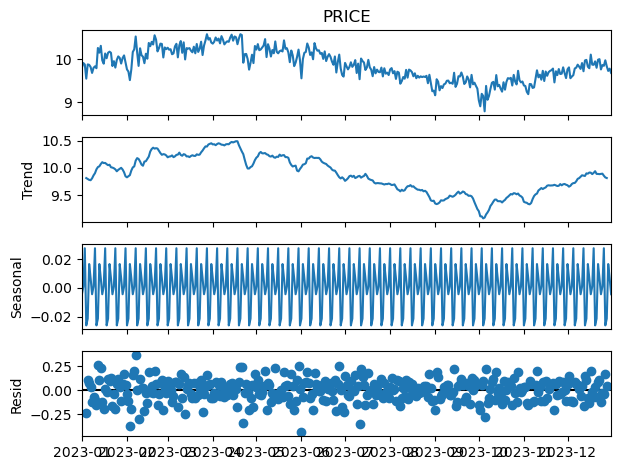

In [347]:
coffee_decomposition = seasonal_decompose(df_coffee_ts['PRICE']['2023-01-01':].resample('1d').mean(), model='additive', period = 7)
coffee_decomposition.plot()
plt.show()

In [346]:
df_coffee_ts['PRICE']['2023-01-01':'2023-01-03'].resample('1d').mean()

DATE
2023-01-01    9.803077
2023-01-02    9.910909
2023-01-03    9.876283
Freq: D, Name: PRICE, dtype: float64

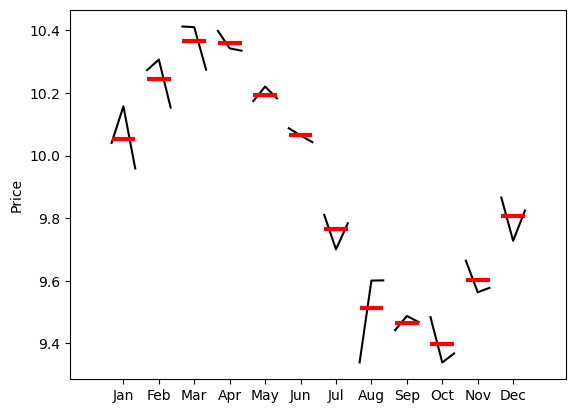

In [356]:
month_plot(df_coffee_ts['PRICE'].resample('ME').mean(), ylabel = 'Price')
plt.show()

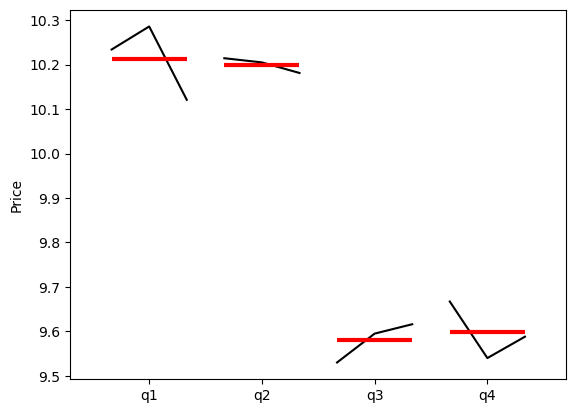

In [358]:
quarter_plot(df_coffee_ts['PRICE'].resample('QE').mean(), ylabel = 'Price')
plt.show()